# Project 2: Investigate the No-show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains data collected from 100k Brazil medical appointments. It provides the information of whether the patients will show up for their scheduled appointments and also some other characteristics associated with each patient.
>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load the dataset
df_origin = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_origin.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df_origin.shape

(110527, 14)

In [4]:
df_origin.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




### Data Cleaning

In [6]:
# Change the columns' names into lowercase and change '-' to '_'
df_origin.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df_origin.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# replace 'Yes' and 'No' in 'no_show' column with int values '1' and '0'
df_origin.no_show.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)
df_origin.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [8]:
# Create a new column for the waiting time between scheduled day and appointment day
df_origin['waitingtime'] = pd.to_datetime(df_origin['appointmentday']) - pd.to_datetime(df_origin['scheduledday'])
df_origin.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waitingtime
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1 days +07:52:37


In [9]:
# Change the data type of the waiting time into int
df_origin['waiting_time'] = ((df_origin['waitingtime']/ np.timedelta64(1, 'D')).astype(int))

In [10]:
df_origin.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waitingtime,waiting_time
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1 days +05:21:52,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1 days +07:51:33,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1 days +07:40:56,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1 days +06:30:29,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1 days +07:52:37,0


In [11]:
# Delete the former column for waiting time
df_origin.drop(['waitingtime'], axis=1, inplace=True)

In [12]:
df_origin.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_time
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [13]:
df_origin.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_time
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,9.532648
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.027798
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000


<font size=4>Found some of the waiting times are negative.</font>

In [14]:
# Only keep the data with positive waiting time
df = df_origin.query('waiting_time >= 0')
df.shape

(110522, 15)

In [15]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_time
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,0.201896,9.533170
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,0.401417,15.027932
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000


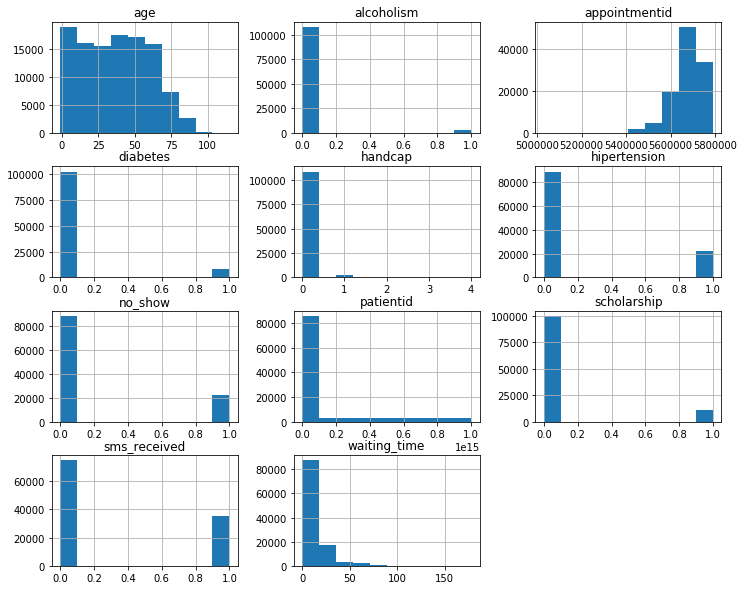

In [16]:
# Visualize the data
df.hist(figsize=(12,10));

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<font size=4>1) Analyze the waiting time </font>

In [19]:
waitingtime_edges = [-1,3,14,178 ]
waitingtime_names = ['short','medium','long']

In [20]:
# Divide the waiting time into three levels
df['time_level'] = pd.cut(df['waiting_time'], waitingtime_edges, labels=waitingtime_names)
df.head()

/anaconda3/envs/dl2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_time,time_level
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,short
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,short
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,short
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,short
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,short


In [23]:
time_totals = df.groupby('time_level').count().patientid
time_totals

time_level
short     58528
medium    25748
long      26246
Name: patientid, dtype: int64

In [24]:
time_counts = df.groupby(['time_level','no_show']).count().patientid
time_counts

time_level  no_show
short       0          52146
            1           6382
medium      0          18400
            1           7348
long        0          17662
            1           8584
Name: patientid, dtype: int64

In [27]:
times_proportions = time_counts['short'] / time_totals['short']
times_proportions

no_show
0    0.890958
1    0.109042
Name: patientid, dtype: float64

In [28]:
timem_proportions = time_counts['medium'] / time_totals['medium']
timem_proportions

no_show
0    0.714619
1    0.285381
Name: patientid, dtype: float64

In [29]:
timel_proportions = time_counts['long'] / time_totals['long']
timel_proportions

no_show
0    0.672941
1    0.327059
Name: patientid, dtype: float64

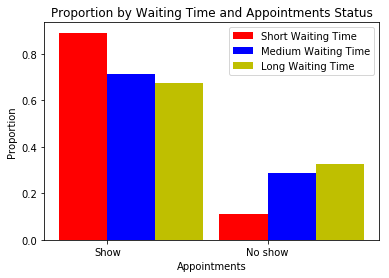

In [43]:
index = np.arange(len(times_proportions))
width = 0.3

times_bars = plt.bar(index, times_proportions, width, color='r', label='Short Waiting Time')
timem_bars = plt.bar(index + width, timem_proportions, width, color='b',label='Medium Waiting Time')
timel_bars = plt.bar(index + width*2, timel_proportions, width, color='y',label='Long Waiting Time')

plt.ylabel('Proportion')
plt.xlabel('Appointments')
plt.title('Proportion by Waiting Time and Appointments Status')
locations = index + width/2
labels = ['Show','No show']  
plt.xticks(locations, labels)
plt.legend()

<font size=4>From the analysis above, it's clear that the patients are more likely to show up for their appointments if the waiting time between the scheduled day and the appointment day is short.</font>

<font size=4>2) Analyze the SMS messages data</font>

In [44]:
sms_counts = df.groupby(['sms_received','no_show']).count().patientid
sms_counts

sms_received  no_show
0             0          62510
              1          12530
1             0          25698
              1           9784
Name: patientid, dtype: int64

In [45]:
sms_totals = df.groupby('sms_received').count().patientid
sms_totals

sms_received
0    75040
1    35482
Name: patientid, dtype: int64

In [46]:
sms_proportions = sms_counts[1] / sms_totals[1]
sms_proportions

no_show
0    0.724255
1    0.275745
Name: patientid, dtype: float64

In [47]:
non_sms_proportions = sms_counts[0] / sms_totals[0]
non_sms_proportions

no_show
0    0.833022
1    0.166978
Name: patientid, dtype: float64

In [48]:
index = np.arange(len(sms_proportions))
width = 0.3  

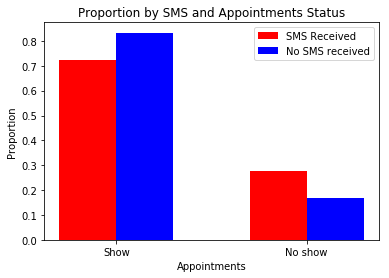

In [49]:
sms_bars = plt.bar(index, sms_proportions, width, color='r', label='SMS Received')
non_sms_bars = plt.bar(index + width, non_sms_proportions, width, color='b',label='No SMS received')

plt.ylabel('Proportion')
plt.xlabel('Appointments')
plt.title('Proportion by SMS and Appointments Status')
locations = index + width / 2 
labels = ['Show','No show']  
plt.xticks(locations, labels)
plt.legend()

<font size=4>For patients who received the SMS messages, the proportion of "No show" is higher than patients that didn't receive the SMS messages. The SMS message seems to have a negative effect on patients to show up for their scheduled appointment  <font>

<font size=4>3) Analyze the scholarship data</font>

In [50]:
scholarship_counts = df.groupby(['scholarship','no_show']).count().patientid
scholarship_counts

scholarship  no_show
0            0          79925
             1          19736
1            0           8283
             1           2578
Name: patientid, dtype: int64

In [51]:
scholarship_totals = df.groupby('scholarship').count().patientid
scholarship_totals

scholarship
0    99661
1    10861
Name: patientid, dtype: int64

In [52]:
scholarship_proportions = scholarship_counts[1] / scholarship_totals[1]
scholarship_proportions

no_show
0    0.762637
1    0.237363
Name: patientid, dtype: float64

In [53]:
non_scholarship_proportions = scholarship_counts[0] / scholarship_totals[0]
non_scholarship_proportions

no_show
0    0.801969
1    0.198031
Name: patientid, dtype: float64

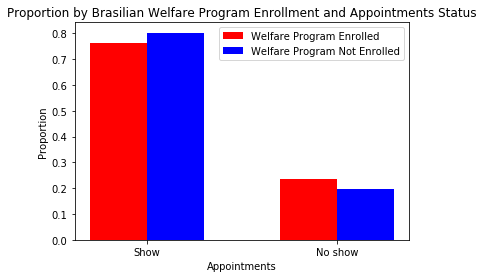

In [54]:
index = np.arange(len(scholarship_proportions))
width = 0.3

scholarship_bars = plt.bar(index, scholarship_proportions, width, color='r', label='Welfare Program Enrolled')
non_scholarship_bars = plt.bar(index + width, non_scholarship_proportions, width, color='b',label='Welfare Program Not Enrolled')

plt.ylabel('Proportion')
plt.xlabel('Appointments')
plt.title('Proportion by Brasilian Welfare Program Enrollment and Appointments Status')
locations = index + width / 2 
labels = ['Show','No show']  
plt.xticks(locations, labels)
plt.legend()

<font size=4>The patients who are not enrolled in the Brasilian Welfare Program are more likely to show up for their appointments, but the difference is not significant.<font>

<font size=4>4) Analyze the hipertension data</font>

In [55]:
hipertension_counts = df.groupby(['hipertension','no_show']).count().patientid
hipertension_counts

hipertension  no_show
0             0          70179
              1          18542
1             0          18029
              1           3772
Name: patientid, dtype: int64

In [56]:
hipertension_totals = df.groupby('hipertension').count().patientid
hipertension_totals

hipertension
0    88721
1    21801
Name: patientid, dtype: int64

In [57]:
hipertension_proportions = hipertension_counts[1] / hipertension_totals[1]
hipertension_proportions

no_show
0    0.82698
1    0.17302
Name: patientid, dtype: float64

In [58]:
non_hipertension_proportions = hipertension_counts[0] / hipertension_totals[0]
non_hipertension_proportions

no_show
0    0.791008
1    0.208992
Name: patientid, dtype: float64

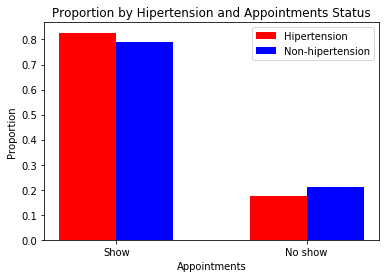

In [59]:
index = np.arange(len(hipertension_proportions))
width = 0.3

hipertension_bars = plt.bar(index, hipertension_proportions, width, color='r', label='Hipertension')
non_hipertension_bars = plt.bar(index + width, non_hipertension_proportions, width, color='b',label='Non-hipertension')

plt.ylabel('Proportion')
plt.xlabel('Appointments')
plt.title('Proportion by Hipertension and Appointments Status')
locations = index + width / 2 
labels = ['Show','No show']  
plt.xticks(locations, labels)
plt.legend()

<font size=4>The patients that have hipertension are more likely to show up for their appointments, but the difference is also not significant.<font>

<font size=4>5) Analyze the diabetes data</font>

In [60]:
diabetes_counts = df.groupby(['diabetes','no_show']).count().patientid
diabetes_counts

diabetes  no_show
0         0          81695
          1          20884
1         0           6513
          1           1430
Name: patientid, dtype: int64

In [61]:
diabetes_totals = df.groupby('diabetes').count().patientid
diabetes_totals

diabetes
0    102579
1      7943
Name: patientid, dtype: int64

In [62]:
diabetes_proportions = diabetes_counts[1] / diabetes_totals[1]
diabetes_proportions

no_show
0    0.819967
1    0.180033
Name: patientid, dtype: float64

In [63]:
non_diabetes_proportions = diabetes_counts[0] / diabetes_totals[0]
non_diabetes_proportions

no_show
0    0.796411
1    0.203589
Name: patientid, dtype: float64

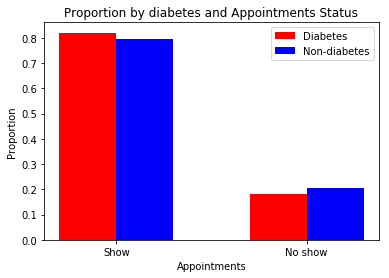

In [64]:
index = np.arange(len(diabetes_proportions))
width = 0.3

diabetes_bars = plt.bar(index, diabetes_proportions, width, color='r', label='Diabetes')
non_diabetes_bars = plt.bar(index + width, non_diabetes_proportions, width, color='b',label='Non-diabetes')

plt.ylabel('Proportion')
plt.xlabel('Appointments')
plt.title('Proportion by diabetes and Appointments Status')
locations = index + width / 2 
labels = ['Show','No show']  
plt.xticks(locations, labels)
plt.legend()

<font size=4>The patients that have diabetes are more likely to show up for their appointments, but the difference is also not significant.<font>

<font size=4>6) Analyze the alcoholism data</font>

In [65]:
alcoholism_counts = df.groupby(['alcoholism','no_show']).count().patientid
alcoholism_counts

alcoholism  no_show
0           0          85525
            1          21637
1           0           2683
            1            677
Name: patientid, dtype: int64

In [66]:
alcoholism_totals = df.groupby('alcoholism').count().patientid
alcoholism_totals

alcoholism
0    107162
1      3360
Name: patientid, dtype: int64

In [67]:
alcoholism_proportions = alcoholism_counts[1] / alcoholism_totals[1]
alcoholism_proportions

no_show
0    0.798512
1    0.201488
Name: patientid, dtype: float64

In [68]:
non_alcoholism_proportions = alcoholism_counts[0] / alcoholism_totals[0]
non_alcoholism_proportions

no_show
0    0.798091
1    0.201909
Name: patientid, dtype: float64

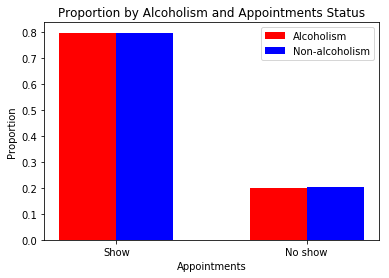

In [69]:
index = np.arange(len(alcoholism_proportions))
width = 0.3

alcoholism_bars = plt.bar(index, alcoholism_proportions, width, color='r', label='Alcoholism')
non_alcoholisms_bars = plt.bar(index + width, non_alcoholism_proportions, width, color='b',label='Non-alcoholism')

plt.ylabel('Proportion')
plt.xlabel('Appointments')
plt.title('Proportion by Alcoholism and Appointments Status')
locations = index + width / 2 
labels = ['Show','No show']  
plt.xticks(locations, labels)
plt.legend()

<font size=4>Whether the patients are alcoholism or not doesn't have a strong relationship to whether they will show up for their appointments.</font>

<font size=4>7) Analyze the handcap data</font>

In [70]:
handcap_counts = df.groupby(['handcap','no_show']).count().patientid
handcap_counts

handcap  no_show
0        0          86374
         1          21909
1        0           1676
         1            364
2        0            146
         1             37
3        0             10
         1              3
4        0              2
         1              1
Name: patientid, dtype: int64

In [71]:
handcap_totals = df.groupby('handcap').count().patientid
handcap_totals

handcap
0    108283
1      2040
2       183
3        13
4         3
Name: patientid, dtype: int64

In [72]:
non_handcap_proportions = handcap_counts[0] / handcap_totals[0]
non_handcap_proportions

no_show
0    0.797669
1    0.202331
Name: patientid, dtype: float64

In [73]:
handcap1_proportions = handcap_counts[1] / handcap_totals[1]
handcap1_proportions

no_show
0    0.821569
1    0.178431
Name: patientid, dtype: float64

In [74]:
handcap2_proportions = handcap_counts[2] / handcap_totals[2]
handcap2_proportions

no_show
0    0.797814
1    0.202186
Name: patientid, dtype: float64

In [75]:
handcap3_proportions = handcap_counts[3] / handcap_totals[3]
handcap3_proportions

no_show
0    0.769231
1    0.230769
Name: patientid, dtype: float64

In [76]:
handcap4_proportions = handcap_counts[4] / handcap_totals[4]
handcap4_proportions

no_show
0    0.666667
1    0.333333
Name: patientid, dtype: float64

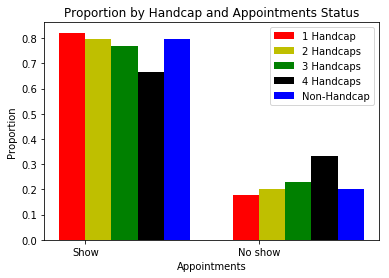

In [80]:
index = np.arange(len(handcap1_proportions))
width = 0.15

handcap1_bars = plt.bar(index, handcap1_proportions, width, color='r', label='1 Handcap')
handcap2_bars = plt.bar(index+width, handcap2_proportions, width, color='y', label='2 Handcaps')
handcap3_bars = plt.bar(index+width*2, handcap3_proportions, width, color='g', label='3 Handcaps')
handcap4_bars = plt.bar(index+width*3, handcap4_proportions, width, color='k', label='4 Handcaps')
non_handcap_bars = plt.bar(index + width*4, non_handcap_proportions, width, color='b',label='Non-Handcap')

plt.ylabel('Proportion')
plt.xlabel('Appointments')
plt.title('Proportion by Handcap and Appointments Status')
locations = index + width / 2 
labels = ['Show','No show']  
plt.xticks(locations, labels)
plt.legend()

<font size=4>The patients that have more kinds of disabilities are less likely to show up on their scheduled appointments, but the amount of the data for "handcap=3" and "handcap=4" are small, which means these data are not very representative. </font>

### Research Question 2  What kinds of gender and age characteristics are associated with diabetes patients?

In [81]:
gender_counts = df.groupby(['gender','diabetes']).count().patientid
gender_counts

gender  diabetes
F       0           66231
        1            5606
M       0           36348
        1            2337
Name: patientid, dtype: int64

In [82]:
gender_totals = df.groupby('gender').count().patientid
gender_totals

gender
F    71837
M    38685
Name: patientid, dtype: int64

In [83]:
female_proportions = gender_counts['F'] / gender_totals['F']
female_proportions

diabetes
0    0.921962
1    0.078038
Name: patientid, dtype: float64

In [84]:
male_proportions = gender_counts['M'] / gender_totals['M']
male_proportions

diabetes
0    0.939589
1    0.060411
Name: patientid, dtype: float64

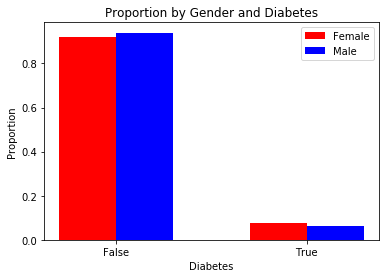

In [85]:
index = np.arange(len(female_proportions))
width = 0.3

female_bars = plt.bar(index, female_proportions, width, color='r', label='Female')
male_bars = plt.bar(index + width, male_proportions, width, color='b',label='Male')

plt.ylabel('Proportion')
plt.xlabel('Diabetes')
plt.title('Proportion by Gender and Diabetes')
locations = index + width / 2 
labels = ['False','True']  
plt.xticks(locations, labels)
plt.legend()

In [111]:
# Delete the data that have negative age
df = df.query('age >= 0')
df.shape

(110521, 17)

In [112]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_time
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.201898,9.533256
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,15.027972
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000


In [113]:
age_edges = [-1,18,37,55,115 ]
age_names = ['very young','young','middle','old']

In [114]:
# Divided patients into four age levels
df['age_levels'] = pd.cut(df['age'], age_edges, labels=age_names)
df.head()

/anaconda3/envs/dl2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_time,time_level,age_levels
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,short,old
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,short,old
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,short,old
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,short,very young
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,short,old


In [115]:
age_counts = df.groupby(['age_levels','diabetes']).count().patientid
age_counts

age_levels  diabetes
very young  0           28814
            1              51
young       0           26916
            1             332
middle      0           24888
            1            2017
old         0           21960
            1            5543
Name: patientid, dtype: int64

In [116]:
age_totals = df.groupby('age_levels').count().patientid
age_totals

age_levels
very young    28865
young         27248
middle        26905
old           27503
Name: patientid, dtype: int64

In [117]:
veryyoung_proportions = age_counts['very young'] / age_totals['very young']
veryyoung_proportions

diabetes
0    0.998233
1    0.001767
Name: patientid, dtype: float64

In [118]:
young_proportions = age_counts['young'] / age_totals['young']
young_proportions

diabetes
0    0.987816
1    0.012184
Name: patientid, dtype: float64

In [119]:
middle_proportions = age_counts['middle'] / age_totals['middle']
middle_proportions

diabetes
0    0.925033
1    0.074967
Name: patientid, dtype: float64

In [120]:
old_proportions = age_counts['old'] / age_totals['old']
old_proportions

diabetes
0    0.798458
1    0.201542
Name: patientid, dtype: float64

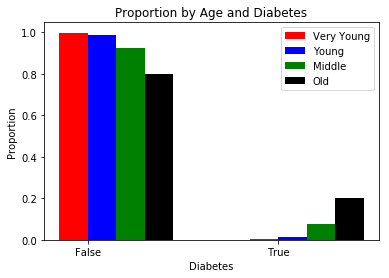

In [121]:
index = np.arange(len(veryyoung_proportions))
width = 0.15

veryyoung_bars = plt.bar(index, veryyoung_proportions, width, color='r', label='Very Young')
young_bars = plt.bar(index + width, young_proportions, width, color='b',label='Young')
middle_bars = plt.bar(index + width*2, middle_proportions, width, color='g', label='Middle')
old_bars = plt.bar(index + width*3, old_proportions, width, color='k',label='Old')

plt.ylabel('Proportion')
plt.xlabel('Diabetes')
plt.title('Proportion by Age and Diabetes')
locations = index + width / 2 
labels = ['False','True']  
plt.xticks(locations, labels)
plt.legend()

<font size=4>The dataset doesn't show apparent gender characteristics on diabetes, but the diabetes prevalence rate among the patients increases with the age.</font>

<a id='conclusions'></a>
## Conclusions


<font size=4> Question 1:</font>

<font size=4> The waiting time, SMS data and scholarship data are important to predict whether a patient will show up for his or her scheduled appointment. Shorter waiting time, no SMS messages and not enrolling in welfare program all have postive correlation with patients showing up for their appointments.  </font>

<font size=4> Question 2:</font>

<font size=4> There isn't a significant difference of the diabetes prevalence rate between the genders from this dataset. The diabetes prevalence rate has a strong relationship to patients' ages and increases with the age. </font>

<font size=4>Dataset Limitations:</font>

<font size=4>(1) After getting the waiting time from the scheduled day and the appointment day, there are five rows contain negative waiting times, which are wrong values that need to be get rid of. There is also a negative value in age column and needs to be deleted for the following analysis.  
    (2) The data from male patients are much less than that from female patients, which might lack representativeness when analyzing some gender characteristics.  </font>